<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [148]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [149]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [150]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [151]:
# Answer:
avg_movie_duration = movies.loc[:,'duration'].mean()
print(avg_movie_duration)

120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [152]:
# Answer:
movies.sort_values(by='duration',inplace=True)
top_5_shortest = movies.head()
top_5_longest = movies.tail()

print('top 5 shortest movies:', top_5_shortest.loc[:,'title'].values)
print('top 5 longest movies:', top_5_longest.loc[:,'title'].values)

top 5 shortest movies: ['Freaks' 'Battleship Potemkin' 'The Cabinet of Dr. Caligari' 'Duck Soup'
 'The Kid']
top 5 longest movies: ['The Ten Commandments' 'Lagaan: Once Upon a Time in India'
 'Once Upon a Time in America' 'Gone with the Wind' 'Hamlet']


#### Create a histogram of duration, choosing an "appropriate" number of bins.

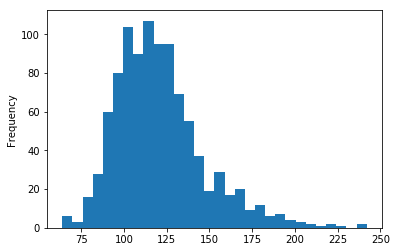

In [153]:
# Answer:
ax = movies.loc[:,'duration'].plot(kind='hist',bins=30)


#### Use a box plot to display that same data.

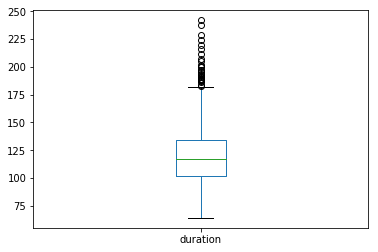

In [154]:
# Answer:
ax = movies.loc[:,'duration'].plot(kind='box')


## Intermediate level

#### Count how many movies have each of the content ratings.

In [155]:
# Answer:
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,0,'Movie Rating')

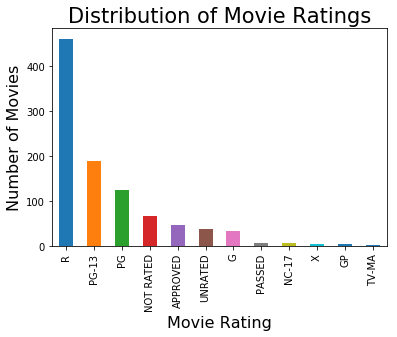

In [156]:
# Answer:
ax = movies.loc[:,'content_rating'].value_counts().plot(kind='bar')

ax.set_title('Distribution of Movie Ratings', fontsize=21,y=1)

ax.set_ylabel('Number of Movies',fontsize=16)
ax.set_xlabel('Movie Rating',fontsize=16)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [157]:
# Answer:

def convert_content_ratings(row):
    if row.loc['content_rating'] in ["NOT RATED", "APPROVED", 'PASSED', 'GP']:
        return "UNRATED"
    else:
        return row.loc['content_rating']
    
movies['content_rating'] = movies.apply(convert_content_ratings,axis='columns')
movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [158]:
# Answer:
def convert_content_ratings_NC17(row):
    if row.loc['content_rating'] in ["X", "TV-MA"]:
        return "NC-17"
    else:
        return row.loc['content_rating']
    
movies['content_rating'] = movies.apply(convert_content_ratings_NC17,axis='columns')
movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [159]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [160]:
# Answer:
#content_rating has 3 missing values based on previous answer

print(movies.loc[movies.loc[:,'content_rating'].isnull(),:])
#code above shows that three movies have missing ratings: Butch Cassidy, True Grit and Where Eagles Dare.
#will convert missing ratings to PG-13 for all three movies.

movies.loc[:,'content_rating'].fillna(value='PG-13',inplace=True)
movies.isnull().sum()


     star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
936          7.4                           True Grit            NaN   
649          7.7                   Where Eagles Dare            NaN   

         genre  duration                                        actors_list  
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...  
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']  
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...  


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [161]:
# Answer:
avg_starrating_2hrs_or_longer = movies.loc[movies.loc[:,'duration']>=120,'star_rating'].mean() 
print(avg_starrating_2hrs_or_longer)

avg_starrating_less_than_2hrs = movies.loc[movies.loc[:,'duration']<120,'star_rating'].mean() 
print(avg_starrating_less_than_2hrs)

7.948898678414094
7.838666666666663


#### Use a visualization to detect whether there is a relationship between duration and star rating.

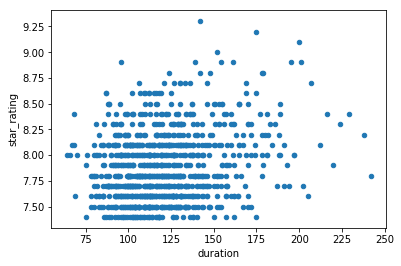

In [162]:
# Answer:
ax = movies.plot(kind='scatter',x='duration',y='star_rating')

#does not appear to be linear relationship

#### Calculate the average duration for each genre.

In [163]:
# Answer:
movies.groupby('genre').duration.mean()


genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

Text(0,0.5,'Average Movie Duration in minutes')

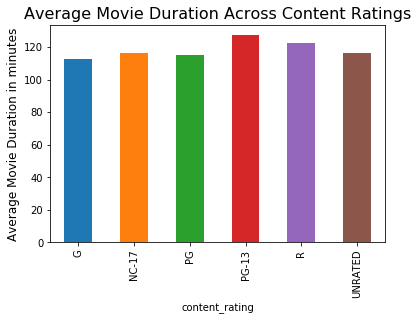

In [164]:
# Answer:
ax = movies.groupby('content_rating').duration.mean().plot(kind='bar')
ax.set_title('Average Movie Duration Across Content Ratings', fontsize=16,y=1)

ax.set_ylabel('Average Movie Duration in minutes',fontsize=12)


#### Determine the top rated movie (by star rating) for each genre.

In [165]:
# Answer:

movies.groupby('genre')['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [166]:
# Answer:
movie_count = movies.loc[:,'title'].value_counts().values
movie_name = movies.loc[:,'title'].value_counts().index
movies_repeated = movie_name[movie_count>1]
movies_repeat_counts = movie_count[movie_count>1]
print(list(movies_repeated))
print(list(movies_repeat_counts))
#above shows that 4 movies appear twice each in the database: True Grit, The Girl with the Dragon Tattoo, Les Mis and Dracula

duplicate_movies = movies.loc[:,'title'].isin(list(movies_repeated))
movies.loc[duplicate_movies,:]

#output shows that these 4 movies are not duplicated in database - they have different actors and thus represent remakes of the same movie.

['True Grit', 'The Girl with the Dragon Tattoo', 'Les Miserables', 'Dracula']
[2, 2, 2, 2]


,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [170]:
# Answer:
movies.loc[:,'genre'].value_counts()
# output shows that western, sci fi, thriller, film noir, family, fantasy, and history genres have less than 10 movies each

genre_list = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
# this is the list of genres with at least 10 movies each

genre_avg_rating = movies.loc[movies.loc[:,'genre'].isin(genre_list),:].groupby('genre')['star_rating'].mean()
genre_avg_rating


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [171]:
# Answer:
genre_count = movies.loc[:,'genre'].value_counts().values
genre_name = movies.loc[:,'genre'].value_counts().index
genres_morethan10 = genre_name[genre_count>10]

print(list(genres_morethan10))

genre_avg_rating = movies.loc[movies.loc[:,'genre'].isin(list(genres_morethan10)),:].groupby('genre')['star_rating'].mean()
genre_avg_rating


['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [183]:
# Answer:



#### Option 4: aggregate by count and mean, then filter using the count

In [181]:
# Answer:
df = movies.groupby('genre')['star_rating'].agg(['count','mean']).sort_values('count')
df
df[df['count']>=10]

,count,mean
genre,,
Mystery,16,7.975000
Horror,29,7.806897
Animation,62,7.914516
Adventure,75,7.933333
Biography,77,7.862338
Crime,124,7.916935
Action,136,7.884559
Comedy,156,7.822436
Drama,278,7.902518


## Bonus

#### Figure out something "interesting" using the actors data!